In [ ]:
# W16D8 - Esame finale
#Analisi diffusione COVID-19 nel mondo

In [42]:
#Task 1
#Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo 

In [1]:
import pandas as pd

In [3]:
Covid_19 = pd.read_csv("C:/Users/utente/Desktop/EPICODE - Data Analyst/03 PYTHON/ESAME PRATICO/covid-data.csv")

In [4]:
#Task 2_Si richiede di verificare le dimensioni del dataset e i relativi metadati;
Covid_19.shape

(429435, 67)

In [7]:
Covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [9]:
#Task 3_Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;
# Rimuoviamo le righe dove il continente non viene specificato
Covid_19_continent = Covid_19[Covid_19['continent'].notna()]

# Raggruppiamo per continente e sommiamo i casi totali
cases_by_continent = Covid_19_continent.groupby('continent')['total_cases'].sum()
print(cases_by_continent)

continent
Africa           1.461689e+10
Asia             2.521673e+11
Europe           2.367567e+11
North America    1.270737e+11
Oceania          1.159805e+10
South America    7.348457e+10
Name: total_cases, dtype: float64


In [13]:
#Task 3_Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;
# Prima convertiamo i valori in "date" in formato data
Covid_19['date']=pd.to_datetime(Covid_19['date'])
# Escludiamo le righe con valori nulli
Covid_19=Covid_19.dropna(subset=['continent', 'date','total_cases'])
# Ricerchiamo la data più recente per ogni continente
ultima_data_per_continente = Covid_19.groupby('continent')['date'].max()   

print(ultima_data_per_continente)

continent
Africa          2024-08-04
Asia            2024-08-04
Europe          2024-08-04
North America   2024-08-04
Oceania         2024-08-04
South America   2024-08-04
Name: date, dtype: datetime64[ns]


In [17]:
#Adesso assoceremo continente-data-n e avremo i casi totali per ogni continente
Covid_19_ultimi_casi = pd.merge(Covid_19, ultima_data_per_continente, on=['continent', 'date'], how='inner')
totali_per_continente = Covid_19_ultimi_casi.groupby('continent')['total_cases'].sum()

print(totali_per_continente)

continent
Africa            13145380.0
Asia             301499099.0
Europe           252916868.0
North America    124492666.0
Oceania           15003352.0
South America     68809418.0
Name: total_cases, dtype: float64


In [31]:
#Task 4_Come richiesto calcoliamo: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo
# Di seguito i continenti da confrontare
continent1 = 'Europe'
continent2 = 'North America'

# Casi totali al mondo
total_cases_world = Covid_19['total_cases'].sum()

# Calcoli per il continente Europe
continent1_cases = Covid_19_continent[Covid_19_continent['continent'] == continent1]['total_cases']
max_continent1 = continent1_cases.max()
mean_continent1 = continent1_cases.mean()
percent_continent1 = (continent1_cases.sum() / total_cases_world) * 100

# Calcoli per il continente North America
continent2_cases = Covid_19_continent[Covid_19_continent['continent'] == continent2]['total_cases']
max_continent2 = continent2_cases.max()
mean_continent2 = continent2_cases.mean()
percent_continent2 = (continent2_cases.sum() / total_cases_world) * 100

# Di seguito verranno messe a confronto, massimo, media e percentuale
print(f"Confronto tra {continent1} e {continent2}:")
print(f"{continent1} - Massimo: {max_continent1}, Media: {mean_continent1}, Percentuale: {percent_continent1}%")
print(f"{continent2} - Massimo: {max_continent2}, Media: {mean_continent2}, Percentuale: {percent_continent2}%")


Confronto tra Europe e North America:
Europe - Massimo: 38997490.0, Media: 2773170.803183639, Percentuale: 7.805876897317327%
North America - Massimo: 103436829.0, Media: 1851468.2261124223, Percentuale: 4.189623749253264%


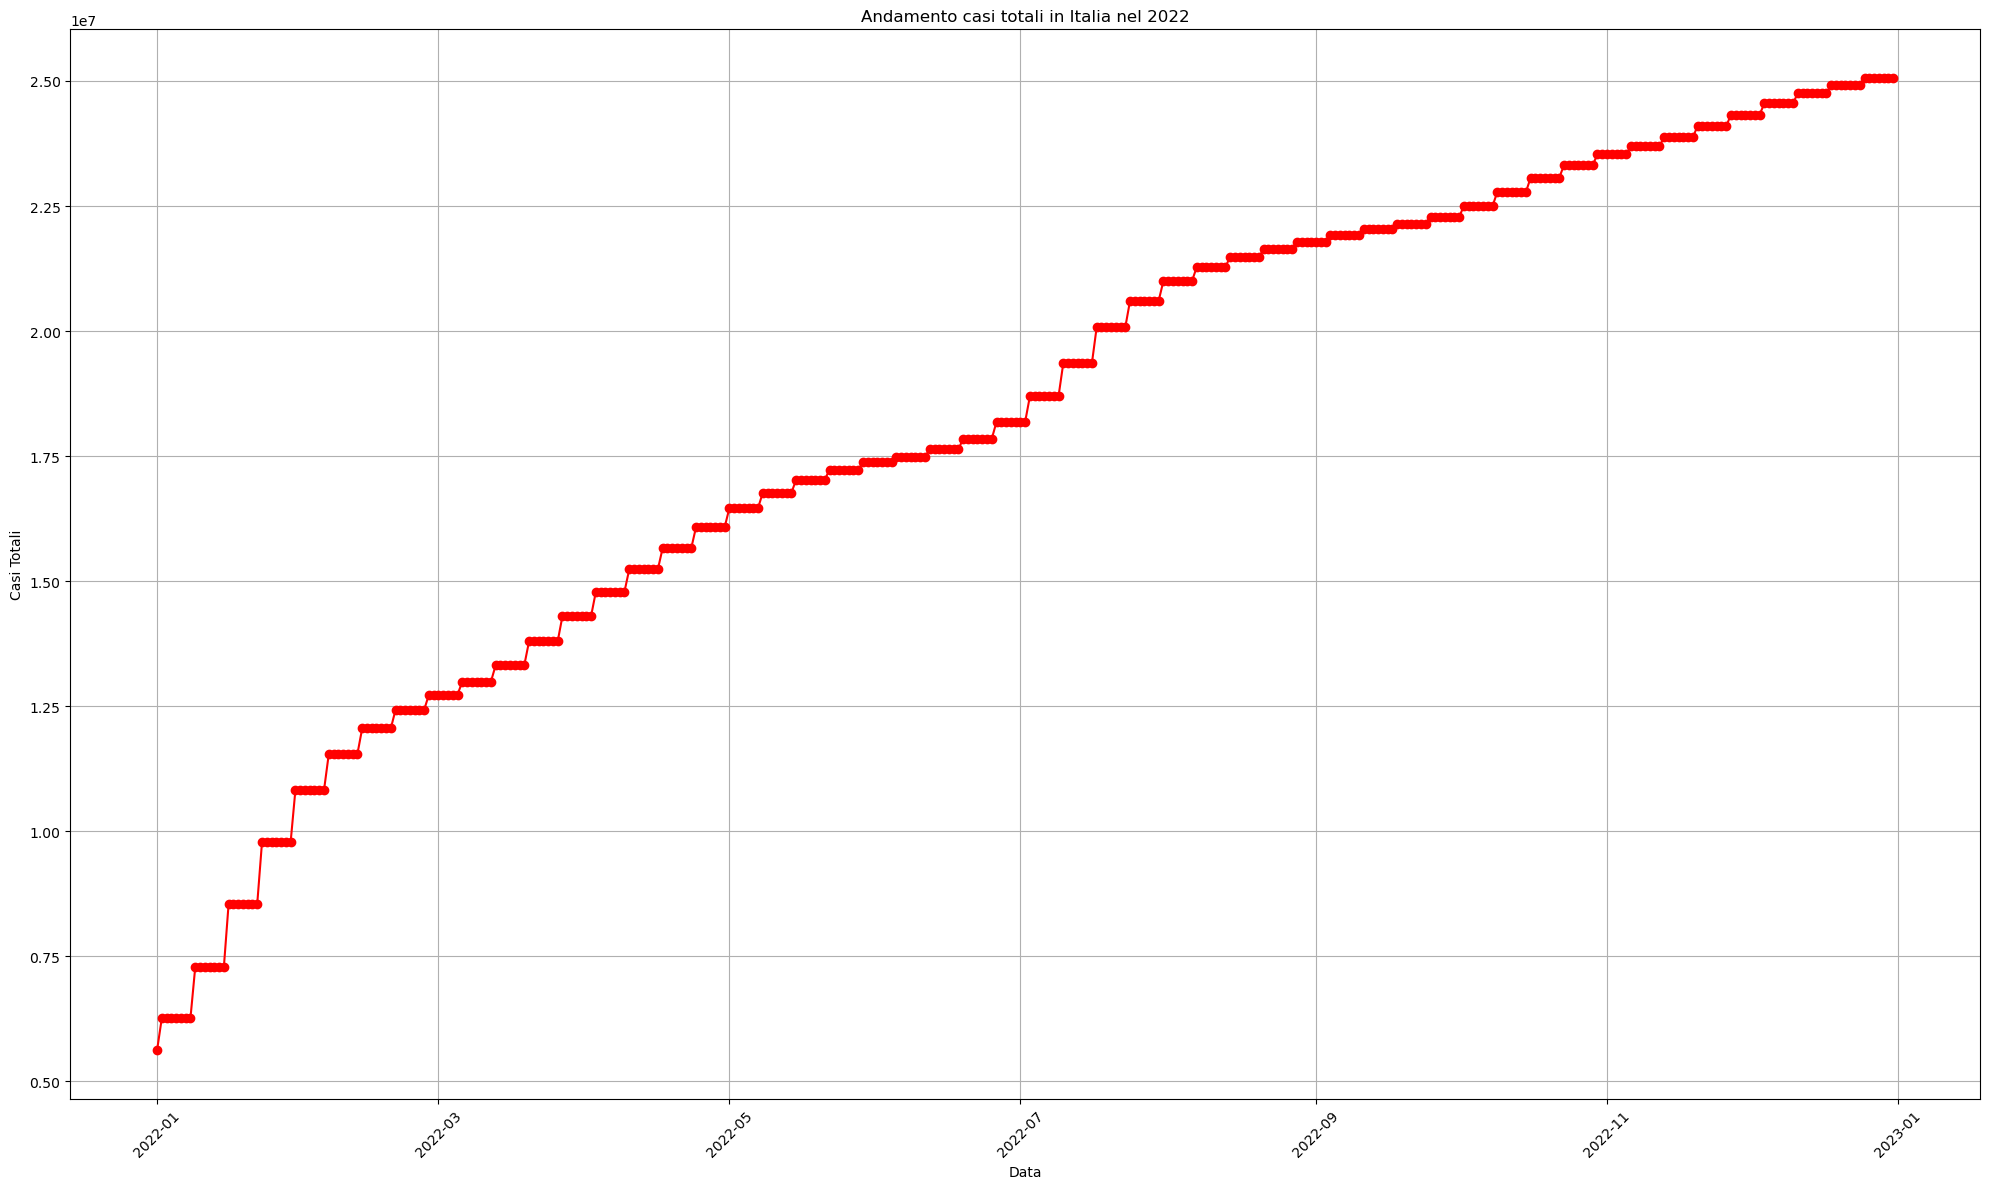

In [23]:
#Task 5_Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un graficoche mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

import matplotlib.pyplot as plt

#trasformiamo la colonna data in stringa
Covid_19.loc[:, 'date'] = Covid_19['date'].astype(str)

#filtro per Italia/2022
Italia_2022 = Covid_19[(Covid_19['location'] == 'Italy') & (Covid_19['date'].str.startswith('2022'))]   
Italia_2022 = Italia_2022.dropna(subset=['date', 'total_cases'])

#Convertiamo la colonna data in formato data
Italia_2022.loc[:, 'date'] = pd.to_datetime(Italia_2022.loc[:, 'date']) 

#Di seguito grafico casi totali rispetto alla data

plt.figure(figsize=(20, 12))
plt.plot(Italia_2022['date'], Italia_2022['total_cases'], marker='o', linestyle='-', color='red')
plt.title('Andamento casi totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

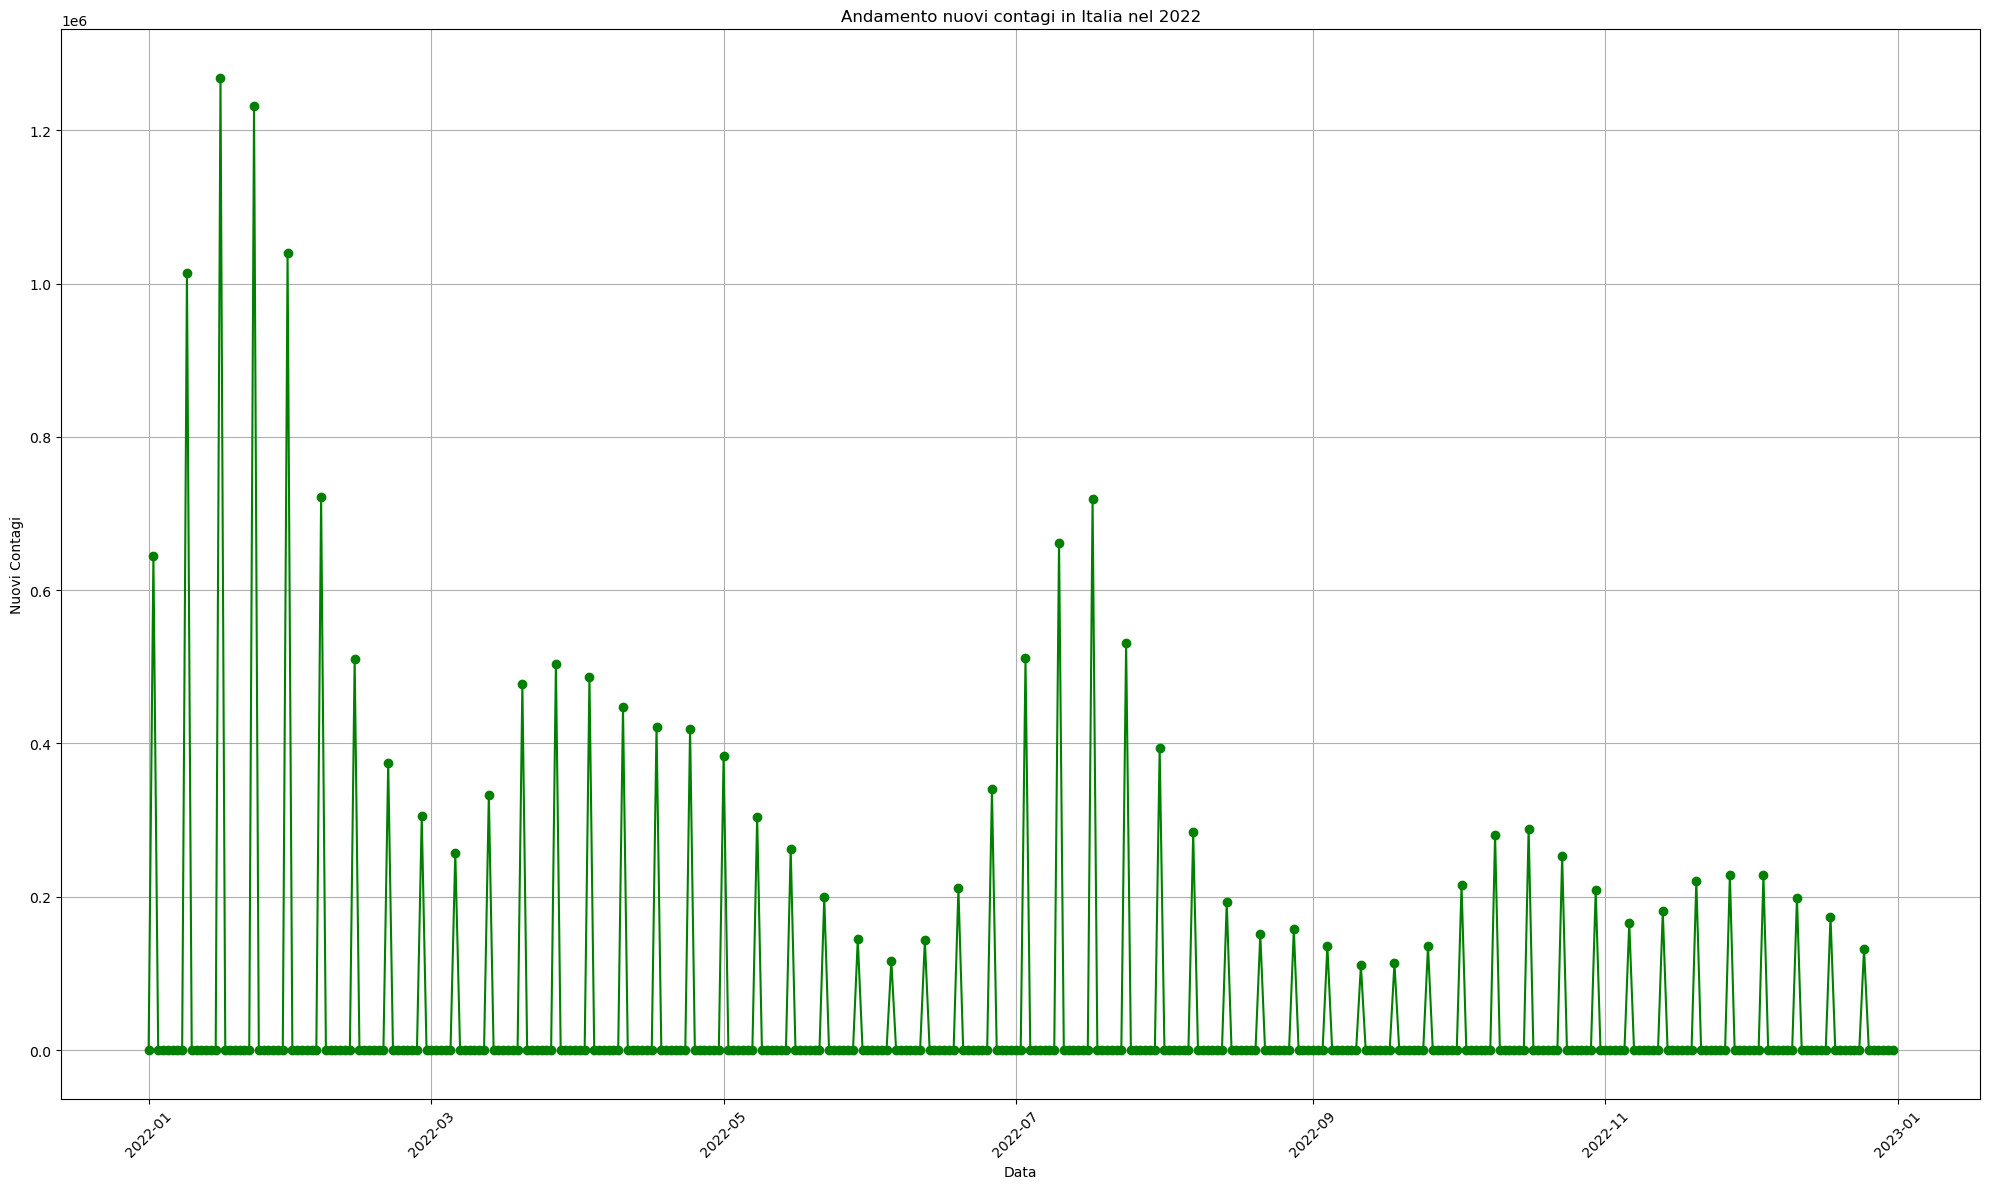

In [25]:
#Di seguito il grafico dei nuovi casi rispetto alla data

Italia_2022 = Italia_2022.dropna(subset=['new_cases'])

plt.figure(figsize=(20, 12))
plt.plot(Italia_2022['date'], Italia_2022['new_cases'], marker='o', linestyle='-', color='green')
plt.title('Andamento nuovi contagi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi Contagi')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Di seguito, infine, un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

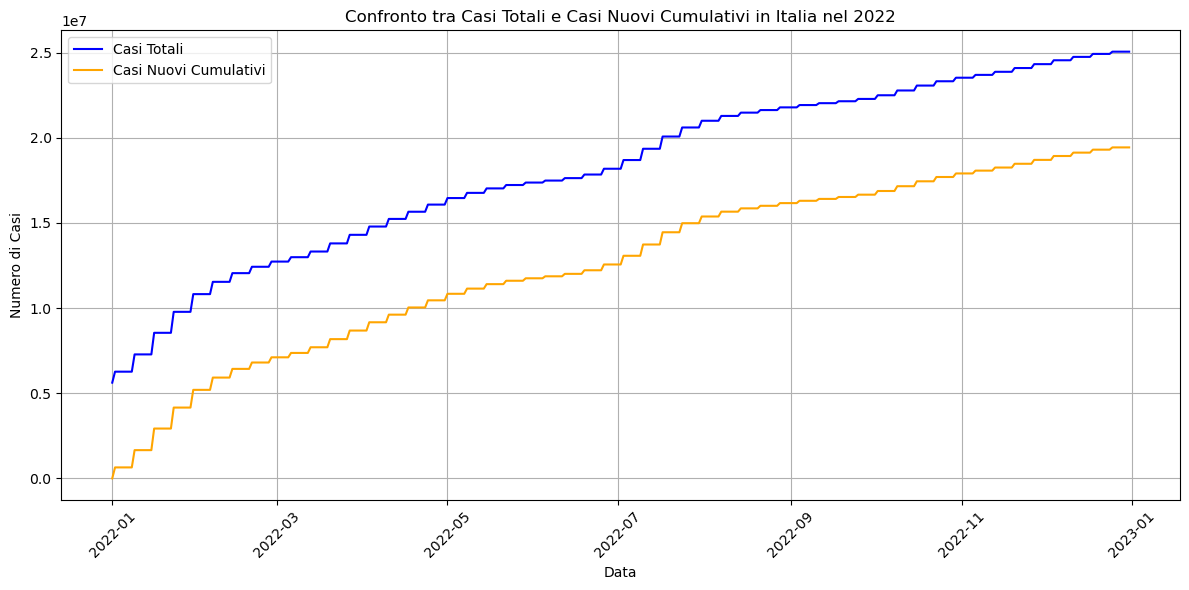

In [27]:
# I dati verranno ordinati per data

Italia_2022 = Italia_2022.sort_values('date')

Italia_2022['cumulative_new_cases'] = Italia_2022['new_cases'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(Italia_2022['date'], Italia_2022['total_cases'], label='Casi Totali', color='blue')
plt.plot(Italia_2022['date'], Italia_2022['cumulative_new_cases'], label='Casi Nuovi Cumulativi', color='orange')
plt.title('Confronto tra Casi Totali e Casi Nuovi Cumulativi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Numero di Casi')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NOTA: Guardando il grafico notiamo che l'andamento di entrmabe è molto simile. La differenza sta nel fatto che per i "casi totali" l'osservazione parte da più su e considera anche il peridodo precedente, invece nei casi cumulativi che considera quelli nuovi, parte da zero.

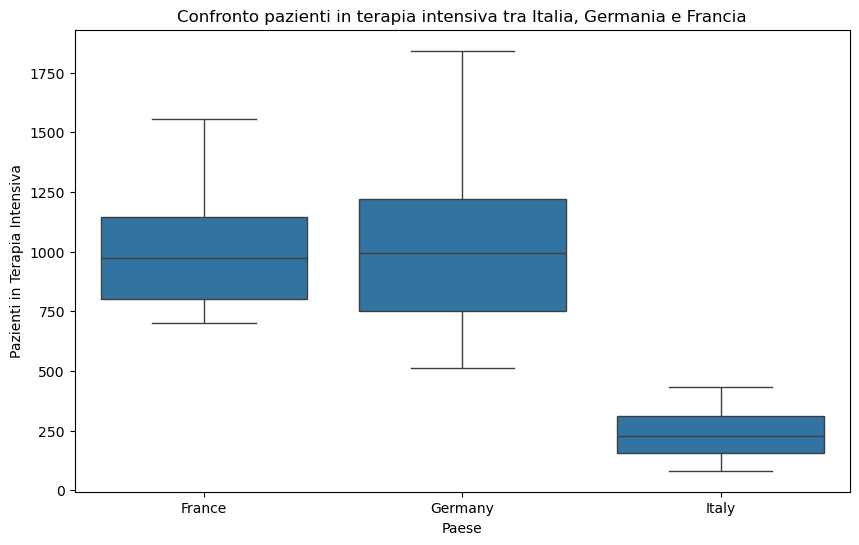

In [33]:
#Task 6_Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo ilnumero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo;
import seaborn as sns

# Filtra i dati da maggio 2022 ad aprile 2023 per Italia, Germania e Francia
Covid_19_icu = Covid_19[(Covid_19['location'].isin(['Italy', 'Germany', 'France'])) & 
            (Covid_19['date'] >= '2022-05-01') & (Covid_19['date'] <= '2023-04-30')]

# Boxplot per il confronto del numero di pazienti in terapia intensiva
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=Covid_19_icu)
plt.title('Confronto pazienti in terapia intensiva tra Italia, Germania e Francia')
plt.xlabel('Paese')
plt.ylabel('Pazienti in Terapia Intensiva')
plt.show()

Adesso sommiamo i pazienti ospedalizzati per Italia, Germania, Francia, Spagna nel 2023 e i valori nulli li sottuiremo con 0.

In [37]:
# Primo passo filtriamo i dati per il 2023 e per le nazioni specificate
Covid_19_hosp_2023 = Covid_19[(Covid_19['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & (Covid_19['date'].str.contains('2023'))]

# Gestiremo i valori nulli sostituendoli con 0
Covid_19_hosp_2023.loc[:, 'hosp_patients'] = Covid_19_hosp_2023['hosp_patients'].fillna(0)

# Sommiamo i pazienti ospedalizzati per singola nazione
somma_pazienti_hosp = Covid_19_hosp_2023.groupby('location')['hosp_patients'].sum()
print(somma_pazienti_hosp)


location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64


COMMENTO: Si nota che l'Italia ha un volume di pazienti in terapia intensiva più basso rispetto alla Francia e Germania, probabilmente perché aveva meno posti disponibili in ICU. Riguardo l'ultima osservazione, ai molti casi in Francia potrebbe essere dato da fatto che non ha attuato misure adeguate rispetto all'Italia o perchè è intervenuta in ritardo. Infine si nota che la Spagna è l'unico paese che mostra dei valori più contenuti rispetto agli altri.